# Reading data from provided csv files

In [1]:
#Importing required packages
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

In [2]:
#Reading data from CSV file available in local system
df_abalone = pd.read_csv('data/abalone/abalone.data', header=None)
#adding labels manually
df_abalone= pd.DataFrame(df_abalone.values, columns=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])

df_abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
1,M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
2,F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
3,M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10
4,I,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7


In [3]:
# describe the data
df_abalone.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000,4177.00,4177.00,4177.0000,4177.000,4177.0000,4177.000,4177
unique,3,134.000,111.00,51.00,2429.0000,1515.000,880.0000,926.000,28
top,M,0.625,0.45,0.15,0.2225,0.175,0.1715,0.275,9
freq,1528,94.000,139.00,267.00,8.0000,11.000,15.0000,43.000,689


### Preprocessing data 

In [4]:
# information of the data
df_abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null object
Diameter          4177 non-null object
Height            4177 non-null object
Whole weight      4177 non-null object
Shucked weight    4177 non-null object
Viscera weight    4177 non-null object
Shell weight      4177 non-null object
Rings             4177 non-null object
dtypes: object(9)
memory usage: 293.8+ KB


In [5]:
# checking if there is any NULL data 

df_abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Sex is either Male ("M"), Female ("F") or Infant ("I"), this is not suitable for regression algorithms, so we create a binary/boolean feature for each of the 3 options:

In [6]:
# for more complicated cases use sklearn.feature_extraction.DictVectorizer
for label in "MFI":
    df_abalone[label] = df_abalone["Sex"] == label

In [7]:
df_abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,M,F,I
0,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15,True,False,False
1,M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7,True,False,False
2,F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9,False,True,False
3,M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10,True,False,False
4,I,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7,False,False,True


In [8]:
#Removing Lable Sex as we have converted into 3 additional labels
del df_abalone["Sex"]

In [9]:
#Ignore the data for which the height is zero
df_abalone = df_abalone[df_abalone['Height']>0]

Data in sklearn are structured as:
* a 2D numpy array (n_samples, n_features), where each column is a feature (e.g. sex and physical dimensions) for each sample, e.g. each measured Abalone.
* a 1D numpy array (n_samples) of the value we aim to predict, e.g. the number of rings, standard variable name y

In [10]:
#getting y values into 1D array
y = df_abalone.Rings.values

In [11]:
del df_abalone["Rings"] 
# remove rings from data, so we can convert all the dataframe to a numpy 2D array.
# Converting all the datatypes to float
X = df_abalone.values.astype(np.float)

### Explorative Data Analysis (EDA)

In [12]:
# pairplot
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(pd.DataFrame(X))
plt.show()

<Figure size 2500x2500 with 110 Axes>

In [13]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1.0,0.0,0.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1.0,0.0,0.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0.0,1.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1.0,0.0,0.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0,0.0,1.0


In [14]:
df_abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,M,F,I
0,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,True,False,False
1,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,True,False,False
2,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,False,True,False
3,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,True,False,False
4,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,False,False,True


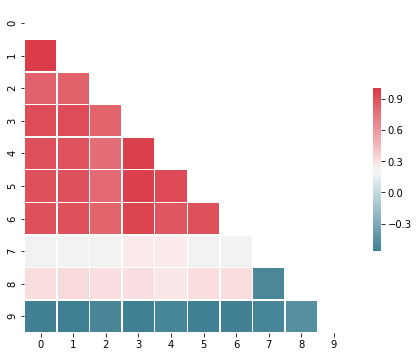

In [15]:
corr = pd.DataFrame(X).corr('pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax);

# Split data in Training and Test sets

We can split the data into training and validation sets and use Machine Learning to create an estimator that can learn from the training set and then check its performance on the test set.

In [21]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y) # splits 75%/25% by default

The DecisionTreeRegressor is a similar algorithm used to estimate a continous variable instead of a discrete one:

In [22]:
from sklearn.tree import DecisionTreeRegressor
# create an estimator, optionally specifying parameters
model = DecisionTreeRegressor()
# fit the estimator to the data
model.fit(train_X, train_y)
# apply the model to the test and training data
predicted_test_y = model.predict(test_X)
predicted_train_y = model.predict(train_X)

In [23]:
from sklearn.metrics import r2_score
print("Train score: ", r2_score(train_y, predicted_train_y))
print("Test score: ", r2_score(test_y, predicted_test_y))

Train score:  1.0
Test score:  0.05815790979730939


We can visualize the results with a scatter-plot of the true number of rings against the predicted number of rings:

In [24]:
def scatter_y(true_y, predicted_y):
    """Scatter-plot the predicted vs true number of rings
    
    Plots:
       * predicted vs true number of rings
       * perfect agreement line
       * +2/-2 number dotted lines

    Returns the root mean square of the error
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(true_y, predicted_y, '.k')
    
    ax.plot([0, 30], [0, 30], '--k')
    ax.plot([0, 30], [2, 32], ':k')
    ax.plot([2, 32], [0, 30], ':k')
    
    rms = (true_y - predicted_y).std()
    
    ax.text(25, 3,
            "Root Mean Square Error = %.2g" % rms,
            ha='right', va='bottom')

    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    
    ax.set_xlabel('True number of rings')
    ax.set_ylabel('Predicted number of rings')
    
    return rms

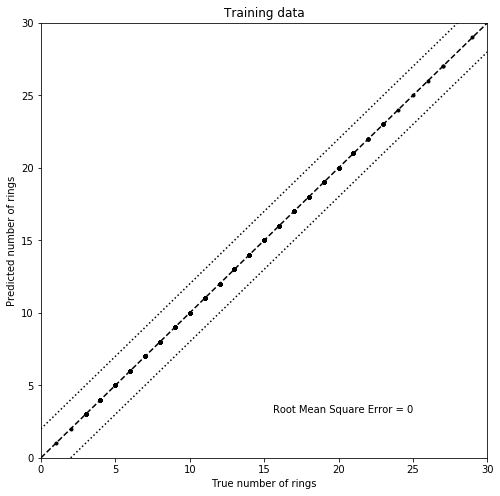

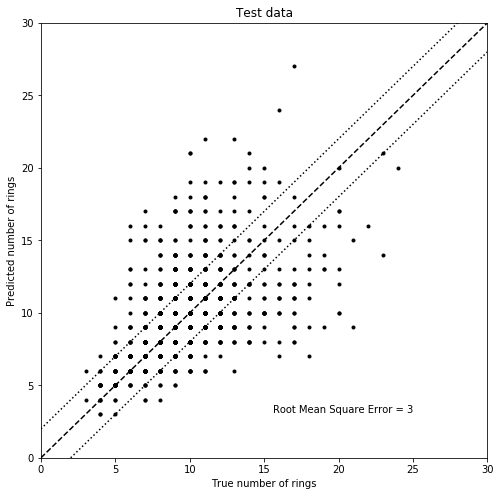

In [25]:
scatter_y(train_y, predicted_train_y)
plt.title("Training data")
scatter_y(test_y, predicted_test_y)
plt.title("Test data");

The Decision Tree overfits the training set, i.e. its parameters are fine tuned to reproduce the results of the training set but generalized badly to data not seen previously.

To prevent this issue we specify a maximum depth of the decision tree of 10, so that the estimator does not "specialize" too much on the training data.

In [26]:
model = DecisionTreeRegressor(max_depth=10)
# fit the estimator to the data
model.fit(train_X, train_y)
# apply the model to the test and train data
predicted_test_y = model.predict(test_X)
predicted_train_y = model.predict(train_X)

In [27]:
print("Train score: ", r2_score(train_y, predicted_train_y))
print("Test score: ", r2_score(test_y, predicted_test_y))

Train score:  0.830494854087276
Test score:  0.2641663027533965


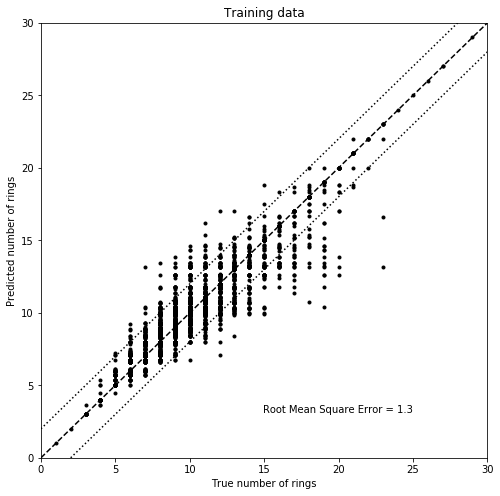

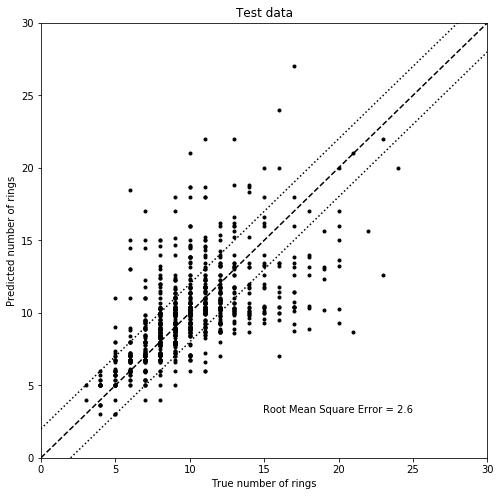

In [28]:
scatter_y(train_y, predicted_train_y)
plt.title("Training data")
rms_decision_tree = scatter_y(test_y, predicted_test_y)
plt.title("Test data");

# Plot learning curves

In [29]:
data_percentage_array = np.linspace(10, 100, 10)

In [30]:
train_error = []
test_error = []
for data_percentage in data_percentage_array:
    model = DecisionTreeRegressor(max_depth=10)
    number_of_samples = int(data_percentage / 100. * len(train_y))
    model.fit(train_X[:number_of_samples,:], train_y[:number_of_samples])

    predicted_train_y = model.predict(train_X)
    predicted_test_y = model.predict(test_X)

    train_error.append((predicted_train_y - train_y).std())
    test_error.append((predicted_test_y - test_y).std())

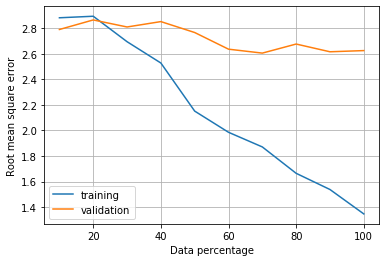

In [31]:
plt.plot(data_percentage_array, train_error, label='training')
plt.plot(data_percentage_array, test_error, label='validation')
plt.grid()
plt.legend(loc=3)
plt.xlabel('Data percentage')
plt.ylabel('Root mean square error');

Inspecting the learning curve, we see that the training error decreases as the DecisionTree fits better the data, but the validation error shows a significant gap compared to training error. That typically means the model is not fitting the data well.

# Fit a Random Forest estimator to the data

In this case it is useful to test a more sophisticated model, for example Random Forests, i.e. a method that trains several Decision Trees and averages them.

sklearn has a very consistent interface, for any estimator, call fit for training then predict to estimate.

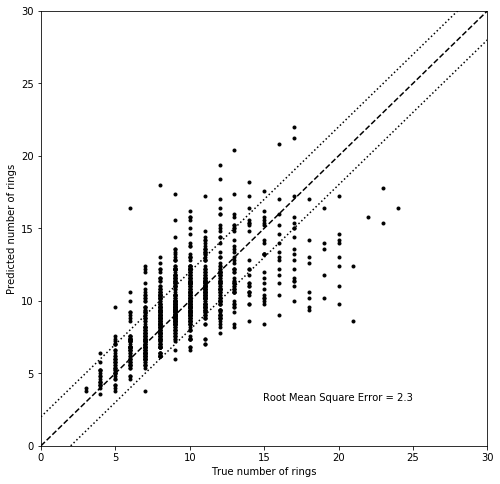

In [32]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=5)
model.fit(train_X, train_y)
predicted_test_y = model.predict(test_X)
rms_random_forest = scatter_y(test_y, predicted_test_y)

In [33]:
print("Root Mean Square error decreases from %.2g to %.2g." % (rms_decision_tree, rms_random_forest))

Root Mean Square error decreases from 2.6 to 2.3.


# Optimize model parameters 

However we have not yet performed any optimization of the Random Forest parameters:
* max_depth: the maximum depth of the Decision Trees
* max_features: the max number of features to consider for each split

Given a list (or distributions) of parameters, RandomizedSearchCV performs a randomized search (less expensive than an exhaustive grid search) for the best parameters.
RandomizedSearchCV uses cross validation, i.e. randomly splits the input data in order to estimate the performance of each model more robustly.

In [34]:
model = RandomForestRegressor(n_estimators=100)

In [35]:
n_features = X.shape[1]

In [36]:
from sklearn.model_selection import RandomizedSearchCV
grid = RandomizedSearchCV(model, n_iter=20, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1, n_features+1)
                                    )
         )
grid.fit(X, y)
print(grid.best_params_)

{'max_features': 7, 'max_depth': 8}


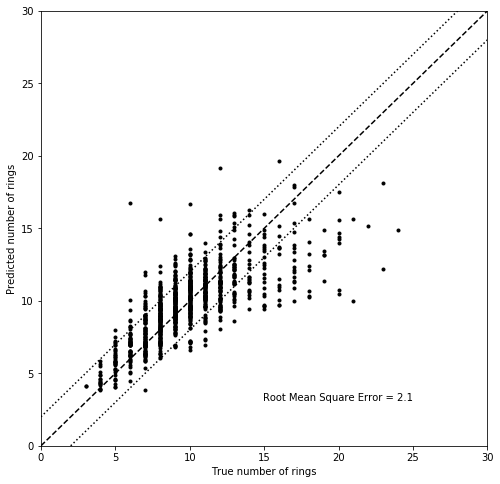

In [37]:
model = RandomForestRegressor(max_features=grid.best_params_["max_features"],
                              max_depth=grid.best_params_["max_depth"])
model.fit(train_X, train_y)
predicted_test_y = model.predict(test_X)
rms_optimized_random_forest = scatter_y(test_y, predicted_test_y)

In [38]:
print("Train score: ", r2_score(train_y, predicted_train_y))
print("Test score: ", r2_score(test_y, predicted_test_y))

Train score:  0.830494854087276
Test score:  0.5460135721466628


In [39]:
print("Root Mean Square error decreases from %.2g to %.2g." % (rms_random_forest, rms_optimized_random_forest))

Root Mean Square error decreases from 2.3 to 2.1.


In [51]:
import pickle 
filehandler = open('Abalone_model_analysis.data', 'wb') 
pickle.dump(grid, filehandler)

In [ ]:
import pickle
import os
import time


dictionary = dict()


def read():
    with open('test.txt', 'rb') as f:
        a = pickle.load(f)
    print(a)
    time.sleep(2)


def dump():
    chs = raw_input('name and number')
    n = chs.split()
    dictionary[n[0]] = n[1]
    with open('test.txt', 'wb') as f:
        pickle.dump(dictionary, f)


Inpt = raw_input('Option : ')
if Inpt == 'read':
    read()
else:
    dump()